# Classificação de redes

Aluno: Gian Franco Joel Condori Luna

## Gerar rede aleatória (com biblioteca), calcular as propriedades básicas, e comparar com os valores analíticos

SOLUÇÃO

Fonte: ChatGPT

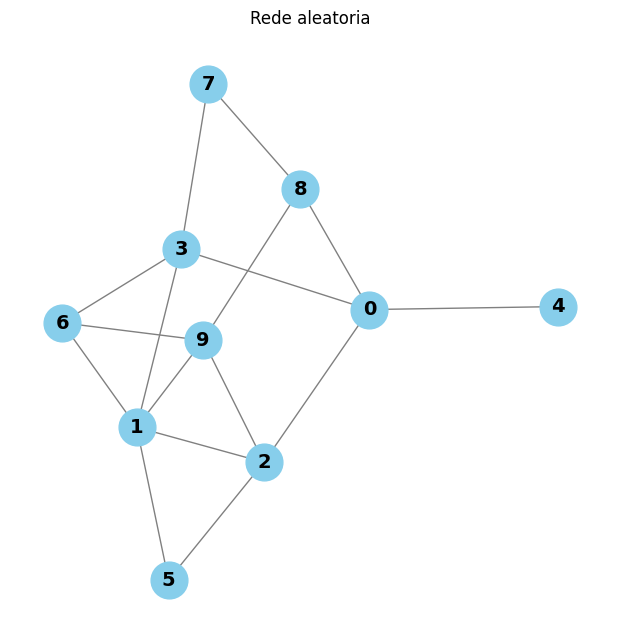

In [59]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros da rede
seed = 42
nos = 10   # Número de vértices
p = 0.28   # Probabilidade de conexão

# 1. Geração da rede aleatória
rede_aleatoria = nx.erdos_renyi_graph(nos, p, seed=seed)

# Graficar o grafo
plt.figure(figsize=(6, 6))
nx.draw(rede_aleatoria, with_labels=True, node_color='skyblue', node_size=700, edge_color='gray', font_size=14, font_weight='bold')
plt.title("Rede aleatoria")
plt.show()

In [60]:
# Cálculo das propriedades básicas
N = rede_aleatoria.number_of_nodes()
print(f"Número de vértices: {N}")

L = rede_aleatoria.number_of_edges()
print(f"Número de arestas: {L}")

Madj = nx.to_numpy_array(rede_aleatoria)
print(f"Matriz de adjacência:\n{Madj}")

# Obter o grau de cada nó
graus = {no: rede_aleatoria.degree(no) for no in rede_aleatoria.nodes}
# Imprimir o grau de cada nó
print("Grau de cada nó:")
for no, grau in graus.items():
    print(f" - k({no}): {grau}")

# Calcular o grau médio
grau_medio = sum(dict(rede_aleatoria.degree()).values()) / N
print(f"Grau médio do grafo <k>: {grau_medio:.2f}")

Número de vértices: 10
Número de arestas: 16
Matriz de adjacência:
[[0. 0. 1. 1. 1. 0. 0. 0. 1. 0.]
 [0. 0. 1. 1. 0. 1. 1. 0. 0. 1.]
 [1. 1. 0. 0. 0. 1. 0. 0. 0. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 1. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
 [0. 1. 1. 0. 0. 0. 1. 0. 1. 0.]]
Grau de cada nó:
 - k(0): 4
 - k(1): 5
 - k(2): 4
 - k(3): 4
 - k(4): 1
 - k(5): 2
 - k(6): 3
 - k(7): 2
 - k(8): 3
 - k(9): 4
Grau médio do grafo <k>: 3.20


In [71]:
# Calcular o coeficiente de aglomeração para cada vértice
coeficiente_aglomeracao = nx.clustering(rede_aleatoria)
# Imprimir o coeficiente de aglomeração para cada nó
print("Coeficiente de aglomeração para cada vértice:")
for no, coef in coeficiente_aglomeracao.items():
    print(f" - c({no}): {coef:.2f}")

# Calcular o coeficiente de aglomeração médio do grafo
coeficiente_aglomeracao_medio_ra = nx.average_clustering(rede_aleatoria)
# Imprimir o coeficiente de aglomeração médio
print(f"Coeficiente de aglomeração médio do grafo(<c>): {coeficiente_aglomeracao_medio_ra:.2f}")

# Dicionário para armazenar o caminho médio mínimo de cada vértice
caminho_medio_minimo = {}
# Calcular o caminho mínimo de cada vértice
for no in rede_aleatoria.nodes:
    # Obter os comprimentos dos caminhos mínimos do vértice atual para todos os outros vértices
    comprimentos = dict(nx.single_source_shortest_path_length(rede_aleatoria, no))
    # Calcular o caminho médio mínimo excluindo o vértice atual
    caminho_medio_minimo[no] = sum(comprimentos.values()) / (len(comprimentos) - 1)
# Imprimir o caminho médio mínimo para cada vértice
print("Caminho médio mínimo de cada vértice:")
for no, caminho in caminho_medio_minimo.items():
    print(f" - <l({no})>: {caminho:.2f}")

# Calcular o caminho médio mínimo do grafo
caminho_medio_minimo_ra = nx.average_shortest_path_length(rede_aleatoria)
# Imprimir o caminho médio mínimo
print(f"Caminho médio mínimo do grafo (<l>): {caminho_medio_minimo_ra:.2f}")

# Calcular o diâmetro do grafo
diametro = nx.diameter(rede_aleatoria)
print(f"Diâmetro do grafo (D): {diametro}")

Coeficiente de aglomeração para cada vértice:
 - c(0): 0.00
 - c(1): 0.40
 - c(2): 0.33
 - c(3): 0.17
 - c(4): 0.00
 - c(5): 1.00
 - c(6): 0.67
 - c(7): 0.00
 - c(8): 0.00
 - c(9): 0.33
Coeficiente de aglomeração médio do grafo(<c>): 0.29
Caminho médio mínimo de cada vértice:
 - <l(0)>: 1.56
 - <l(1)>: 1.56
 - <l(2)>: 1.67
 - <l(3)>: 1.56
 - <l(4)>: 2.44
 - <l(5)>: 2.11
 - <l(6)>: 1.78
 - <l(7)>: 2.11
 - <l(8)>: 1.78
 - <l(9)>: 1.67
Caminho médio mínimo do grafo (<l>): 1.82
Diâmetro do grafo (D): 3


## Gerar rede livre de escala (com biblioteca), calcular as propriedades básicas, e comparar com os valores analíticos

SOLUÇÃO

Fonte: ChatGPT

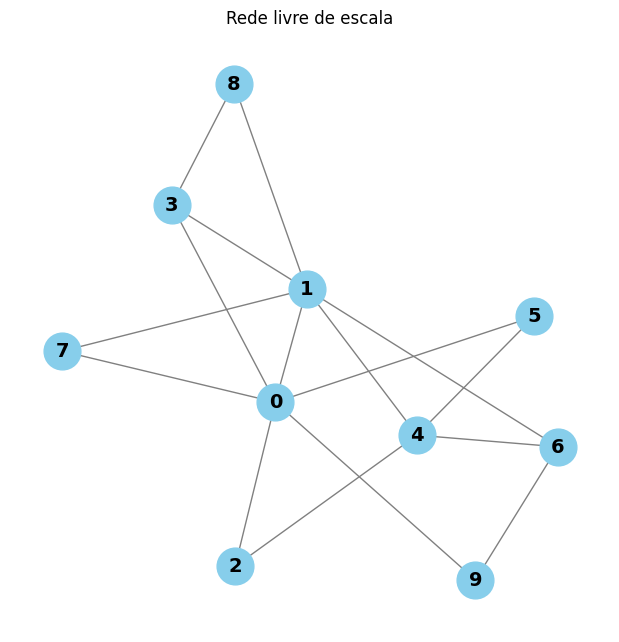

In [64]:
# Parâmetros da rede livre de escala
m = 2  # Número de arestas a serem anexadas para cada novo nó

# Geração da rede livre de escala
rede_livre_escala = nx.barabasi_albert_graph(nos, m, seed=seed)

# Graficar o grafo
plt.figure(figsize=(6, 6))
nx.draw(rede_livre_escala, with_labels=True, node_color='skyblue', node_size=700, edge_color='gray', font_size=14, font_weight='bold')
plt.title("Rede livre de escala")
plt.show()

In [65]:
# Cálculo das propriedades básicas
N = rede_livre_escala.number_of_nodes()
print(f"Número de vértices: {N}")

L = rede_livre_escala.number_of_edges()
print(f"Número de arestas: {L}")

Madj = nx.to_numpy_array(rede_livre_escala)
print(f"Matriz de adjacência:\n{Madj}")

# Obter o grau de cada nó
graus = {no: rede_livre_escala.degree(no) for no in rede_livre_escala.nodes}
# Imprimir o grau de cada nó
print("Grau de cada nó:")
for no, grau in graus.items():
    print(f" - k({no}): {grau}")

# Calcular o grau médio
grau_medio = sum(dict(rede_livre_escala.degree()).values()) / N
print(f"Grau médio do grafo <k>: {grau_medio:.2f}")

Número de vértices: 10
Número de arestas: 16
Matriz de adjacência:
[[0. 1. 1. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 0. 1. 1. 0. 1. 1. 1. 0.]
 [1. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 1. 0. 0. 1. 1. 0. 0. 0.]
 [1. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0. 0. 1.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
Grau de cada nó:
 - k(0): 6
 - k(1): 6
 - k(2): 2
 - k(3): 3
 - k(4): 4
 - k(5): 2
 - k(6): 3
 - k(7): 2
 - k(8): 2
 - k(9): 2
Grau médio do grafo <k>: 3.20


In [72]:
# Calcular o coeficiente de aglomeração para cada vértice
coeficiente_aglomeracao = nx.clustering(rede_livre_escala)
# Imprimir o coeficiente de aglomeração para cada nó
print("Coeficiente de aglomeração para cada vértice:")
for no, coef in coeficiente_aglomeracao.items():
    print(f" - c({no}): {coef:.2f}")

# Calcular o coeficiente de aglomeração médio do grafo
coeficiente_aglomeracao_medio_rle = nx.average_clustering(rede_livre_escala)
# Imprimir o coeficiente de aglomeração médio
print(f"Coeficiente de aglomeração médio do grafo(<c>): {coeficiente_aglomeracao_medio_rle:.2f}")

# Dicionário para armazenar o caminho médio mínimo de cada vértice
caminho_medio_minimo = {}
# Calcular o caminho mínimo de cada vértice
for no in rede_livre_escala.nodes:
    # Obter os comprimentos dos caminhos mínimos do vértice atual para todos os outros vértices
    comprimentos = dict(nx.single_source_shortest_path_length(rede_livre_escala, no))
    # Calcular o caminho médio mínimo excluindo o vértice atual
    caminho_medio_minimo[no] = sum(comprimentos.values()) / (len(comprimentos) - 1)
# Imprimir o caminho médio mínimo para cada vértice
print("Caminho médio mínimo de cada vértice:")
for no, caminho in caminho_medio_minimo.items():
    print(f" - <l({no})>: {caminho:.2f}")

# Calcular o caminho médio mínimo do grafo
caminho_medio_minimo_rle = nx.average_shortest_path_length(rede_livre_escala)
# Imprimir o caminho médio mínimo
print(f"Caminho médio mínimo do grafo (<l>): {caminho_medio_minimo_rle:.2f}")

# Calcular o diâmetro do grafo
diametro = nx.diameter(rede_livre_escala)
print(f"Diâmetro do grafo (D): {diametro}")

Coeficiente de aglomeração para cada vértice:
 - c(0): 0.13
 - c(1): 0.27
 - c(2): 0.00
 - c(3): 0.67
 - c(4): 0.17
 - c(5): 0.00
 - c(6): 0.33
 - c(7): 1.00
 - c(8): 1.00
 - c(9): 0.00
Coeficiente de aglomeração médio do grafo(<c>): 0.36
Caminho médio mínimo de cada vértice:
 - <l(0)>: 1.33
 - <l(1)>: 1.33
 - <l(2)>: 1.89
 - <l(3)>: 1.67
 - <l(4)>: 1.56
 - <l(5)>: 1.89
 - <l(6)>: 1.67
 - <l(7)>: 1.78
 - <l(8)>: 2.11
 - <l(9)>: 1.89
Caminho médio mínimo do grafo (<l>): 1.71
Diâmetro do grafo (D): 3


## Analisar se a rede do item "2" tem efeito estatístico de pequeno mundo: \<l> menor que \<l>\*, e \<c> maior que \<c>\*, sendo os valores * os referentes à rede aleatória de mesmo número de vértices e arestas.

SOLUÇÃO

Como no primeiro exercício fizemos uma rede aleatória que possui o mesmo número de nós e arestas que a rede livre de escala, podemos usar essas redes para responder a esta questão.

Podemos concluir que a rede de escala livre TEM O EFEITO ESTATÍSTICO DE PEQUENO MUNDO.

In [78]:
# Comparação dos valores para verificar o efeito pequeno mundo
efeito_pequeno_mundo = (caminho_medio_minimo_rle < caminho_medio_minimo_ra) and \
                       (coeficiente_aglomeracao_medio_rle > coeficiente_aglomeracao_medio_ra)

print("\nAnálise do Efeito de Pequeno Mundo:")
print(f"Caminho médio mínimo da rede livre de escala (<l>): {caminho_medio_minimo_rle}")
print(f"Caminho médio mínimo da rede aleatória (<l>*): {caminho_medio_minimo_ra}")
print(f"Coeficiente de aglomeração médio da rede livre de escala: {coeficiente_aglomeracao_medio_rle}")
print(f"Coeficiente de aglomeração médio da rede aleatória: {coeficiente_aglomeracao_medio_ra}")
print("---------------------------------------------------------------")
print(f"RPTA: A rede livre de escala possui o efeito de pequeno mundo? {'SIM' if efeito_pequeno_mundo else 'Não'}")
print("---------------------------------------------------------------")



Análise do Efeito de Pequeno Mundo:
Caminho médio mínimo da rede livre de escala (<l>): 1.711111111111111
Caminho médio mínimo da rede aleatória (<l>*): 1.8222222222222222
Coeficiente de aglomeração médio da rede livre de escala: 0.35666666666666663
Coeficiente de aglomeração médio da rede aleatória: 0.29
---------------------------------------------------------------
RPTA: A rede livre de escala possui o efeito de pequeno mundo? SIM
---------------------------------------------------------------
